<h1>Unit (and intuition) test for Viral Dynamics model from ODE_Dynamics_viral.py</h1>

<p>&nbsp;</p>

<p>Here&#39;s a basic Viral Dynamics model</p>

<p>&nbsp;</p>


In [4]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import sys
sys.path.append('..')
import ODE_Dynamics_viral as od

In [5]:
par=tf.constant(np.array([[0.1, 5, 0.1, 2, 0.1]], dtype=np.float32))
mod = od.ViralDynamics(par)
init_state=tf.constant(np.array([[0.001,0.999, 0.001]], dtype=np.float32))
init_time=tf.constant(0.0)
soln_times=tf.constant(np.linspace(0.0,200.0,num=100,dtype=np.float32))

In [6]:
dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
print(results.diagnostics)

_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1326>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)


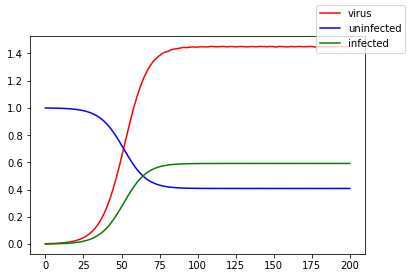

In [7]:
import matplotlib.pyplot as plt
t = results.times ; v = results.states[:,0,0] ; x = results.states[:,0,1] ; y = results.states[:,0,2]
fig1 = plt.figure()
plt.plot(t, v,"r-", t, x, "b-", t, y, "g-")
fig1.legend(['virus','uninfected','infected'])

Integrating "backwards" gives garbage, because the set of states corresponding to an initial state [0,1] is measure-zero:

In [10]:
init_time = 100
soln_times = np.linspace(102.0, 0.0, 52)
soln_times = tf.constant(soln_times)
init_state = np.array([[v.numpy()[49], x.numpy()[49], y.numpy()[49]]])
init_state = tf.constant(init_state)
results2 = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)

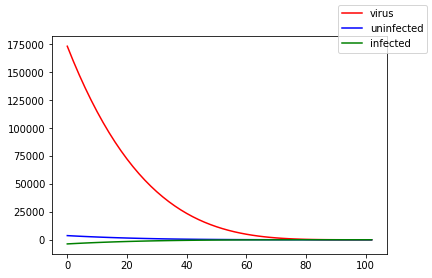

In [12]:
fig2 = plt.figure()
t2 = results2.times ; v2 = results2.states[:,0,0] ; x2 = results2.states[:,0,1] ; y2 = results2.states[:,0,2]
plt.plot(t2, v2,"r-", t2, x2, "b-", t2, y2, "g-")
fig2.legend(['virus','uninfected','infected'])